In [ ]:
from datasets import load_dataset

In [ ]:
ds = load_dataset("keremberke/german-traffic-sign-detection", name="full")
example = ds['train'][0]

In [ ]:
example

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

def plot_bounding_boxes(row):
    # Label information
    labels = ['animals', 'construction', 'cycles crossing', 'danger', 'no entry', 'pedestrian crossing', 'school crossing', 'snow', 'stop', 'bend', 'bend left', 'bend right', 'give way', 'go left', 'go left or straight', 'go right', 'go right or straight', 'go straight', 'keep left', 'keep right', 'no overtaking', 'no overtaking -trucks-', 'no traffic both ways', 'no trucks', 'priority at next intersection', 'priority road', 'restriction ends', 'restriction ends -overtaking -trucks--', 'restriction ends -overtaking-', 'restriction ends 80', 'road narrows', 'roundabout', 'slippery road', 'speed limit 100', 'speed limit 120', 'speed limit 20', 'speed limit 30', 'speed limit 50', 'speed limit 60', 'speed limit 70', 'speed limit 80', 'traffic signal', 'uneven road']

    # Get the image from the row
    image = row['image']
    
    # Create a copy of the image to draw on
    draw_image = image.copy()
    draw = ImageDraw.Draw(draw_image)
    
    # Get all bounding boxes, categories, and ids
    bboxes = row['objects']['bbox']
    categories = row['objects']['category']
    ids = row['objects']['id']
    
    # Choose a font
    try:
        font = ImageFont.truetype("arial.ttf", 12)
    except IOError:
        font = ImageFont.load_default()
    
    # Define colors for different categories (you may want to expand this)
    colors = ['red', 'green', 'blue', 'yellow', 'purple', 'cyan', 'magenta', 'orange']
    
    # Draw each bounding box and its label
    for bbox, category, id in zip(bboxes, categories, ids):
        x, y, w, h = bbox
        color = colors[category % len(colors)]  # Cycle through colors
        
        # Draw the bounding box
        draw.rectangle([x, y, x+w, y+h], outline=color, width=3)
        
        # Prepare label
        label_text = labels[category] if category < len(labels) else f"Unknown ({category})"
        label = f"{label_text} (ID: {id})"
        
        # Get text size (updated method)
        left, top, right, bottom = font.getbbox(label)
        text_width = right - left
        text_height = bottom - top
        
        # Draw label background
        draw.rectangle([x, y-text_height-4, x+text_width+4, y], fill=color)
        
        # Draw label text
        draw.text((x+2, y-text_height-2), label, fill="white", font=font)
    
    # Display the image with matplotlib
    plt.figure(figsize=(12, 8))
    plt.imshow(draw_image)
    plt.axis('off')
    plt.title(f"Image ID: {row['image_id']}")
    plt.show()

plot_bounding_boxes(ds['train'][3])

In [ ]:
import pandas as pd
from datasets import Dataset

def convert_annotations_to_dataframe(dataset: Dataset) -> pd.DataFrame:
    data = []
    
    for item in dataset:
        image_id = item['image_id']
        filename = f"{image_id}.jpg"  # Assuming the image files are saved as JPEGs
        
        if 'objects' in item and 'bbox' in item['objects']:
            for bbox, category in zip(item['objects']['bbox'], item['objects']['category']):
                x, y, w, h = bbox
                label = category  # You might want to map this to a category name if available
                data.append({
                    'filename': filename,
                    'x': x,
                    'y': y,
                    'w': w,
                    'h': h,
                    'label': label
                })
    
    return pd.DataFrame(data)

In [ ]:
convert_annotations_to_dataframe(ds['train'])

In [1]:
from vlhf.hugging_face import HuggingFace
from vlhf.visual_layer import VisualLayer
import os
from dotenv import load_dotenv

# Authentication
load_dotenv()

HF_TOKEN = os.getenv("HF_TOKEN")
VL_USER_ID = os.getenv("VL_USER_ID")
VL_ENV = os.getenv("VL_ENV")

hf = HuggingFace(HF_TOKEN)
vl = VisualLayer(VL_USER_ID, VL_ENV)

2024-08-07 16:41:04.121 | INFO     | vlhf.hugging_face:__init__:64 - Hugging Face session created
2024-08-07 16:41:04.122 | INFO     | vlhf.visual_layer:__init__:20 - Visual Layer session created


In [2]:
# hf.download_dataset("keremberke/german-traffic-sign-detection", name="full", image_key="image", bbox_key="objects", bbox_label_names=['animals', 'construction', 'cycles crossing', 'danger', 'no entry', 'pedestrian crossing', 'school crossing', 'snow', 'stop', 'bend', 'bend left', 'bend right', 'give way', 'go left', 'go left or straight', 'go right', 'go right or straight', 'go straight', 'keep left', 'keep right', 'no overtaking', 'no overtaking -trucks-', 'no traffic both ways', 'no trucks', 'priority at next intersection', 'priority road', 'restriction ends', 'restriction ends -overtaking -trucks--', 'restriction ends -overtaking-', 'restriction ends 80', 'road narrows', 'roundabout', 'slippery road', 'speed limit 100', 'speed limit 120', 'speed limit 20', 'speed limit 30', 'speed limit 50', 'speed limit 60', 'speed limit 70', 'speed limit 80', 'traffic signal', 'uneven road'])

In [3]:
hf.download_dataset("keremberke/csgo-object-detection", name="full", 
                    image_key="image", 
                    bbox_key="objects", 
                    bbox_label_names=['ct', 'cthead', 't', 'thead']
)

2024-08-07 16:41:04.730 | INFO     | vlhf.hugging_face:download_dataset:110 - Downloading dataset keremberke/csgo-object-detection and saving to local path keremberke/csgo-object-detection


Generating train split:   0%|          | 0/3879 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/383 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/192 [00:00<?, ? examples/s]

2024-08-07 16:41:30.787 | INFO     | vlhf.hugging_face:download_dataset:116 - Adding image filename to dataset


Map:   0%|          | 0/4454 [00:00<?, ? examples/s]

2024-08-07 16:41:31.059 | INFO     | vlhf.hugging_face:download_dataset:121 - Adding bbox label name to dataset


Map:   0%|          | 0/4454 [00:00<?, ? examples/s]

Saving images:   0%|          | 0/4454 [00:00<?, ?it/s]

In [4]:
hf.dataset[0]['objects']

{'area': [120, 144, 2016, 2232],
 'bbox': [[86.0, 186.0, 10.0, 12.0],
  [329.0, 194.0, 12.0, 12.0],
  [80.0, 187.0, 32.0, 63.0],
  [321.0, 194.0, 31.0, 72.0]],
 'category': [3, 3, 2, 2],
 'category_name': ['thead', 'thead', 't', 't'],
 'id': [37, 38, 39, 40]}

In [5]:
hf.to_vl(vl_session=vl)

2024-08-07 16:41:47.897 | INFO     | vlhf.hugging_face:to_vl:177 - Preparing upload to Visual Layer
2024-08-07 16:41:51.289 | INFO     | vlhf.visual_layer:create_dataset:24 - Creating dataset: csgo-object-detection


Dataset url: https://app.visual-layer.com/dataset/e4be6e6a-5498-11ef-a5a0-a27db88c92da


2024-08-07 16:42:12.466 | INFO     | vlhf.visual_layer:create_dataset:26 - Dataset csgo-object-detection successfully created in Visual Layer!


In [6]:
! tar -xvf /home/dnth/Desktop/vl-hf-workflow/notebooks/saved_images/keremberke/csgo-object-detection.tar -C /home/dnth/Desktop/vl-hf-workflow/notebooks/saved_images/keremberke

./
./1000_jpg.rf.273e182f0962764a9b21a47a2c6a3286.jpg
./1001_jpg.rf.39e8b0e0b6f20295051fb3382e6107f4.jpg
./1001_jpg.rf.83fa9f38a59eec654eacd62f44806caf.jpg
./1001_jpg.rf.de9e7f57ef4f29dd91b65ffc6c2afa51.jpg
./1002_jpg.rf.1c35836be874df571f47abb73ce12d24.jpg
./1002_jpg.rf.8ac47af98cb4b233430ff570ef13125d.jpg
./1003_jpg.rf.056000479fe8480075f6d9fdb08f4db6.jpg
./1003_jpg.rf.b8b1fab562549a81e2549e25cc1bd0ee.jpg
./1003_jpg.rf.f932176ecc18529e2c4a2d569e4821ba.jpg
./1004_jpg.rf.8af916ff721bc8f6ea435eabb4143a18.jpg
./1005_jpg.rf.1953d24ec04eaf8c90b163e9ea8c1b96.jpg
./1005_jpg.rf.6d00f2f9ab293999fa0e963e21a182a2.jpg
./1005_jpg.rf.e6846159ab65e7b819bed0fec898aefb.jpg
./1006_jpg.rf.4bd4e5f75d66bfd02de01c17b5c7ef29.jpg
./1006_jpg.rf.7a61e787edb5fb368a65c160d8704c03.jpg
./1007_jpg.rf.4d48ae05ecae1748ac1b2656dbf57030.jpg
./1007_jpg.rf.5500691a3ceb76334a6c2ea39df61508.jpg
./1007_jpg.rf.aab32d55e1a14dca4a2d08c625945224.jpg
./1008_jpg.rf.3fc0591da641aa5b30be00750b8d228f.jpg
./1008_jpg.rf.5eee8fb6f3f30b

In [7]:
import pandas as pd

df = pd.read_parquet("saved_images/keremberke/object_annotations.parquet")

In [8]:
df

,filename,col_x,row_y,width,height,label
0,1627065498_jpg.rf.897441306281fe80f38b7afebfe2...,86.0,186.0,10.0,12.0,thead
1,1627065498_jpg.rf.897441306281fe80f38b7afebfe2...,329.0,194.0,12.0,12.0,thead
2,1627065498_jpg.rf.897441306281fe80f38b7afebfe2...,80.0,187.0,32.0,63.0,t
3,1627065498_jpg.rf.897441306281fe80f38b7afebfe2...,321.0,194.0,31.0,72.0,t
4,371_jpg.rf.cd38e365b6bfa38d9043ffa3ae0a8653.jpg,148.0,142.0,47.0,79.0,ct
...,...,...,...,...,...,...
9344,406_jpg.rf.0ed731d59d9d38b7e5461b9a3dc85fa8.jpg,203.0,179.0,12.0,20.0,ct
9345,406_jpg.rf.0ed731d59d9d38b7e5461b9a3dc85fa8.jpg,206.0,181.0,5.0,4.0,cthead
9346,1415_jpg.rf.0f33ba8e06ff8de7e4a4842ed885d37c.jpg,245.0,198.0,15.0,15.0,thead
9347,1415_jpg.rf.0f33ba8e06ff8de7e4a4842ed885d37c.jpg,235.0,197.0,38.0,82.0,t


In [9]:
# plot the bounding boxes from the dataframe
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def plot_bounding_boxes_from_df(df):
    for filename, group in df.groupby('filename'):
        image = Image.open(f"saved_images/keremberke/{filename}")
        draw = ImageDraw.Draw(image)
        
        for i, row in group.iterrows():
            x, y, w, h = row['col_x'], row['row_y'], row['width'], row['height']
            label = row['label']
            draw.rectangle([x, y, x+w, y+h], outline="red", width=3)
            left, top, right, bottom = draw.textbbox((x, y-10), str(label))
            draw.rectangle((left-5, top-5, right+5, bottom+5), fill="red")
            draw.text((x, y-10), str(label), fill="white")

        
        plt.figure(figsize=(12, 8))
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Image: {filename}")
        plt.show()

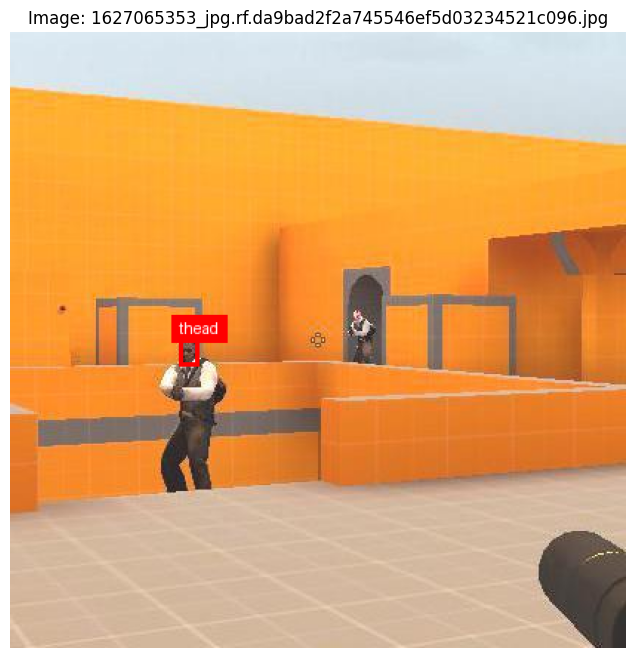

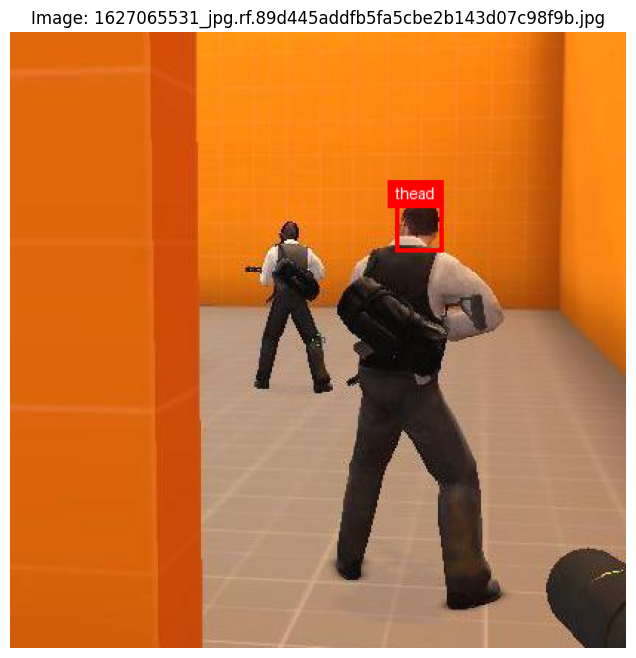

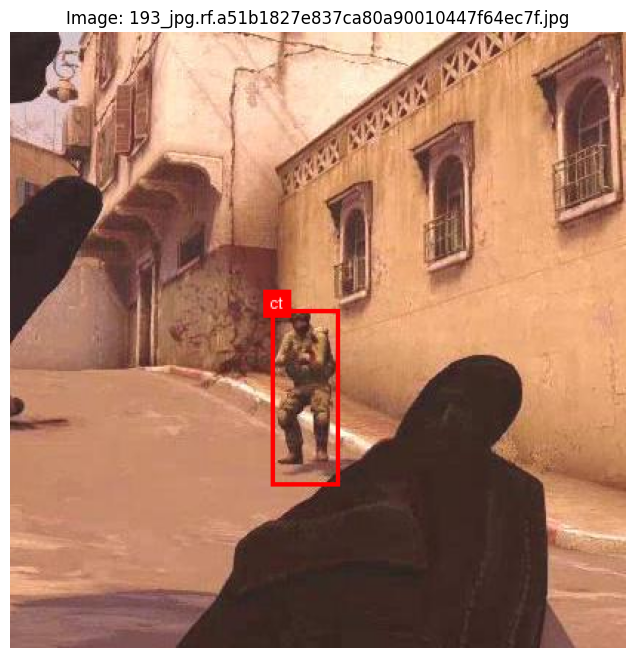

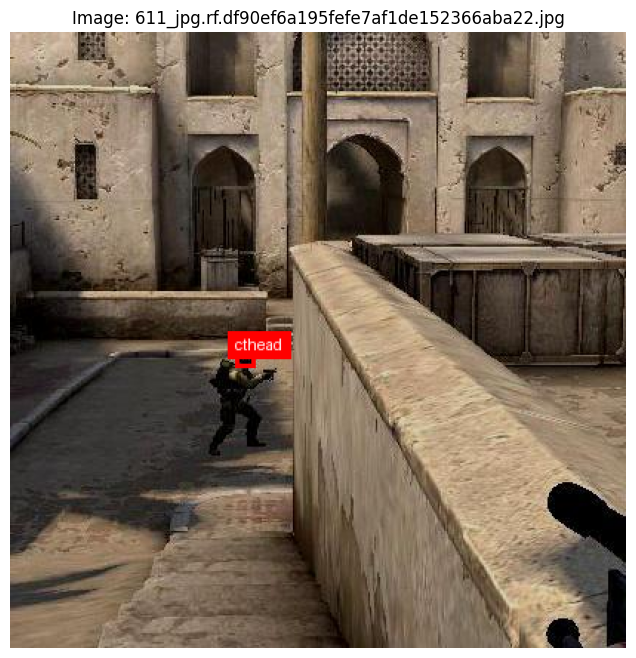

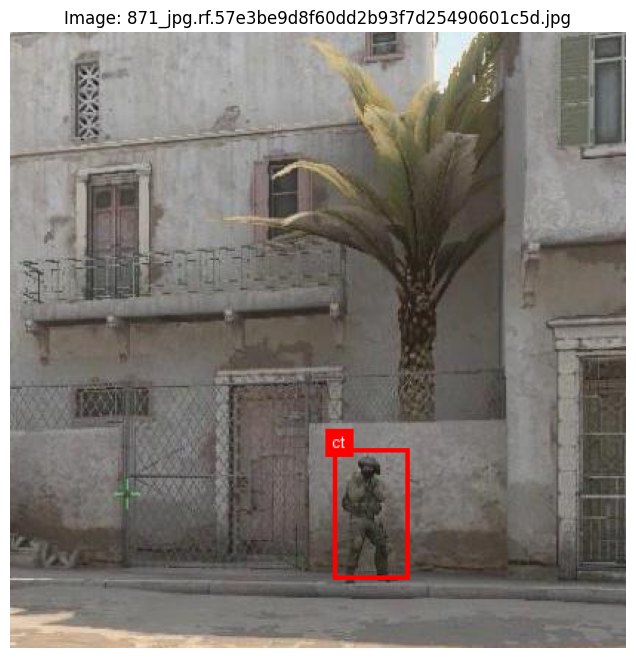

In [11]:
plot_bounding_boxes_from_df(df.sample(5))